# TopSBM: Topic Modeling with Stochastic Block Models

In [1]:
%load_ext autoreload
%autoreload 2

import os
import pylab as plt
%matplotlib inline  

from sbmtm import sbmtm
import graph_tool.all as gt

from matplotlib import pyplot as plt

In [2]:
import numpy as np

# Fitting the model

In [3]:
## we create an instance of the sbmtm-class
model = sbmtm()

## we have to create the word-document network from the corpus
#model.make_graph(texts,documents=titles)

In [4]:
## we can also skip the previous step by saving/loading a graph
#model.save_graph(filename = 'graph.xml.gz')
model.load_graph(filename = 'graph.xml.gz')

In [5]:
g=model.g
clabel = g.vp['kind']
state_args = {'clabel': clabel, 'pclabel': clabel}
if "count" in g.ep:
    state_args["eweight"] = g.ep.count

In [ ]:
print(g)
%time state = gt.minimize_nested_blockmodel_dl(g,B_min=20, B_max=160,overlap=True, verbose=True, nonoverlap_init=False,deg_corr=True)

<Graph object, undirected, with 3011 vertices and 43715 edges at 0x7f32304ec080>


In [78]:
state

<NestedBlockState object, with base <OverlapBlockState object with 74 blocks, degree corrected, for graph <Graph object, undirected, with 3011 vertices and 43715 edges at 0x7f32304ec080>, at 0x7f31e94b98d0>, and 4 levels of sizes [(3011, 74), (74, 15), (15, 2), (2, 1)] at 0x7f31eabf4550>

In [43]:
state.draw(layout='bipartite', output='bipartite_overlap.png')

(<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f32304ec080, at 0x7f31e93905c0>,
 <Graph object, directed, with 3102 vertices and 3101 edges at 0x7f31e93743c8>,
 <PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f31e93743c8, at 0x7f31dfed3f60>)

In [44]:
model.state=state
model.mdl=state.entropy()

In [105]:
state.draw(output='circular_overlap.png')

(<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f32304ec080, at 0x7f31e023d390>,
 <Graph object, directed, with 3102 vertices and 3101 edges at 0x7f31e025c6d8>,
 <PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f31e025c6d8, at 0x7f31dfb93128>)

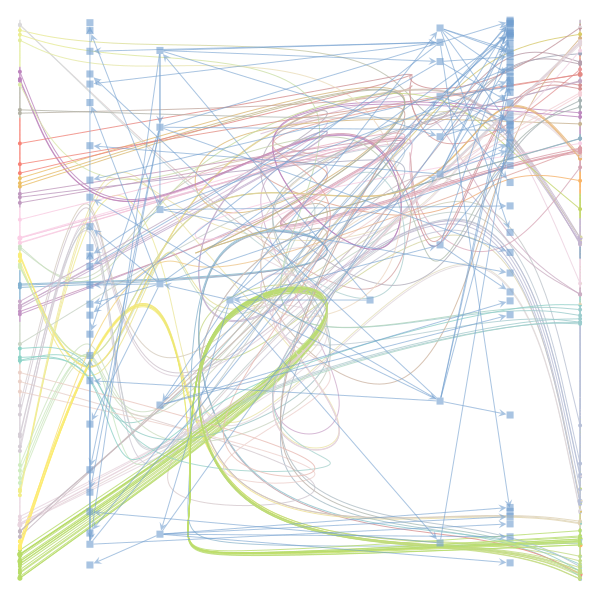

In [103]:
model.plot(nedges=100)

In [46]:
L = len(state.levels)

In [47]:
dict_groups_L = {}
if L == 2:
    model.L = 1
    for l in range(L-1):
        dict_groups_l = model.get_groups(l=l)
        dict_groups_L[l] = dict_groups_l
        ## omit trivial levels: l=L-1 (single group), l=L-2 (bipartite)
else:
    model.L = L-2
    for l in range(L-2):
        dict_groups_l = model.get_groups(l=l)
        dict_groups_L[l] = dict_groups_l
model.groups= dict_groups_L

/usr/lib/python3.6/site-packages/graph_tool/inference/overlap_blockmodel.py:287: UserWarning: unrecognized keyword arguments: ['overlap']
  str(list(kwargs.keys())))


In [48]:
model.get_groups(l=0)

/usr/lib/python3.6/site-packages/graph_tool/inference/overlap_blockmodel.py:287: UserWarning: unrecognized keyword arguments: ['overlap']
  str(list(kwargs.keys())))


{'Bd': 26,
 'Bw': 48,
 'p_tw_w': array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.66666667],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 'p_td_d': array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 1., 1., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'p_w_tw': array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0. 

In [49]:
state.get_levels()[0]

<OverlapBlockState object with 74 blocks, degree corrected, for graph <Graph object, undirected, with 3011 vertices and 43715 edges at 0x7f32304ec080>, at 0x7f31e94b98d0>

In [ ]:
## fit the model
gt.seed_rng(32) ## seed for graph-tool's random number generator --> same results
model.fit(B_min=2, B_max=10, verbose=True, overlap=True)

# Plotting the result

The output shows the (hierarchical) community structure in the word-document network as inferred by the stochastic block model:

- document-nodes are on the left
- word-nodes are on the right
- different colors correspond to the different groups

The result is a grouping of nodes into groups on multiple levels in the hierarchy:

- on the uppermost level, each node belongs to the same group (square in the middle)
- on the next-lower level, we split the network into two groups: the word-nodes and the document-nodes (blue sqaures to the left and right, respectively). This is a trivial structure due to the bipartite character of the network.
- only next lower levels constitute a non-trivial structure: We now further divide nodes into smaller groups (document-nodes into document-groups on the left and word-nodes into word-groups on the right)

In [ ]:
model.plot(nedges=1000)

In [ ]:
model.plot("bipartitehSBM.pdf", nedges=1000)

# The basics

## Topics
For each word-group on a given level in the hierarchy, we retrieve the $n$ most common words in each group -- these are the topics!


In [172]:
l=0

In [180]:
model.topics(l=l,n=200)

{0: [('ENSG00000105143', 0.02357100766057749),
  ('ENSG00000155511', 0.022981732469063054),
  ('ENSG00000113196', 0.020035356511490868),
  ('ENSG00000154975', 0.019446081319976428),
  ('ENSG00000036565', 0.01885680612846199),
  ('ENSG00000183654', 0.01708898055391868),
  ('ENSG00000165606', 0.01708898055391868),
  ('ENSG00000122584', 0.016499705362404242),
  ('ENSG00000187135', 0.015910430170889805),
  ('ENSG00000125813', 0.015910430170889805),
  ('ENSG00000165462', 0.015321154979375369),
  ('ENSG00000170091', 0.01473187978786093),
  ('ENSG00000187323', 0.01473187978786093),
  ('ENSG00000162992', 0.014142604596346494),
  ('ENSG00000164588', 0.014142604596346494),
  ('ENSG00000186297', 0.014142604596346494),
  ('ENSG00000147571', 0.013553329404832056),
  ('ENSG00000177511', 0.013553329404832056),
  ('ENSG00000146352', 0.013553329404832056),
  ('ENSG00000145526', 0.013553329404832056),
  ('ENSG00000215612', 0.013553329404832056),
  ('ENSG00000182674', 0.01296405421331762),
  ('ENSG000001

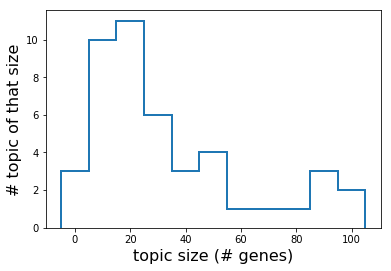

In [174]:
topic_lenghts = []
for topic in model.topics(l=l,n=2000):
    topic_lenghts.append(len(model.topics(l=0,n=2000)[topic]))
    
fig=plt.figure()
plt.hist(topic_lenghts, histtype='step', range=(-5,105), bins=11, lw=2)
plt.xlabel("topic size (# genes)", fontsize=16)
plt.ylabel("# topic of that size", fontsize=16)
plt.show()
fig.savefig("topic_size_%d.png"%l)

In [178]:
for ensg in model.topics(l=l,n=200)[9]:
    print(ensg[0])

ENSG00000120054
ENSG00000135903
ENSG00000004846
ENSG00000140522
ENSG00000077498
ENSG00000188467
ENSG00000105679
ENSG00000168843
ENSG00000065371
ENSG00000134160
ENSG00000165192
ENSG00000184486
ENSG00000188269
ENSG00000118113
ENSG00000124900
ENSG00000182968
ENSG00000127530
ENSG00000100142
ENSG00000039987
ENSG00000204347
ENSG00000163081
ENSG00000139915
ENSG00000205126
ENSG00000080511
ENSG00000125816
ENSG00000126550
ENSG00000126856
ENSG00000109047
ENSG00000153820
ENSG00000254466
ENSG00000204033
ENSG00000205649
ENSG00000188770
ENSG00000118434
ENSG00000140623
ENSG00000197595
ENSG00000276076
ENSG00000205867
ENSG00000101251
ENSG00000196859
ENSG00000173976
ENSG00000260548
ENSG00000164796
ENSG00000224902
ENSG00000175018
ENSG00000163914
ENSG00000105392
ENSG00000105954
ENSG00000280165
ENSG00000166884
ENSG00000130368
ENSG00000165182


## Topic-distribution in each document
Which topics contribute to each document?

In [158]:
## select a document (by its index)
i_doc = 14
print(model.documents[i_doc])
## get a list of tuples (topic-index, probability)
#model.topicdist(i_doc,l=0)

058ac81a-3b90-4e7d-8f7b-9c34fbc77997


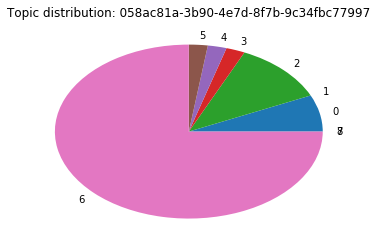

In [159]:
data = [el[1] for el in model.topicdist(i_doc,l=l)]
labels = [el[0] for el in model.topicdist(i_doc,l=l)]
fig=plt.figure()
plt.pie(data, labels=labels)
plt.title("Topic distribution: %s"%model.documents[i_doc])
plt.show()
fig.savefig("topic_distr_%s.png"%model.documents[i_doc])

# Extra: Clustering of documents - for free.
The stochastic block models clusters the documents into groups.
We do not need to run an additional clustering to obtain this grouping.


In [168]:
model.clusters(l=0,n=500)

{0: [('007f49fe-d251-4ae4-9313-86d765b13499', 1.0),
  ('ced1ce50-d6eb-4e46-9ae7-868cebded849', 1.0),
  ('0f0b9f59-eeab-47a2-9aa5-642d06963fe4', 1.0),
  ('969472c4-f5e0-4e37-8d5c-22ef54e674f5', 1.0),
  ('a16e680a-52ef-4d61-a2e7-d6dcd7da7616', 1.0),
  ('3a1f9f5b-2c01-4023-94e9-9a34f9ae8e6f', 1.0),
  ('b84940eb-7f19-44a7-93e8-8fdddc668ea3', 1.0),
  ('6cfe4458-1396-4646-bce7-e2bfbcdb6b86', 1.0),
  ('81df14d6-c7aa-44ca-a6b5-29373563afa7', 1.0),
  ('823fe3f1-1e0f-4d35-8060-e54ba636992e', 1.0),
  ('a31ae0ac-683a-4e75-9af7-03bae233d6f2', 1.0),
  ('23e0ae85-b11a-4cf6-a78f-12d33af37783', 1.0),
  ('459da4d7-7821-4275-a733-576e4504ce5f', 1.0),
  ('686fb7ee-bdd2-4c41-ab25-c0d8b0ccc049', 1.0),
  ('0abe1897-c3a9-47e5-8a59-e5a2232b23db', 1.0),
  ('a4e8501a-254e-424d-9dd1-c499076e610a', 1.0),
  ('62b665c7-bb8a-4e6e-a21a-10d5ea519d1a', 1.0),
  ('a717b697-d2cc-4edb-9742-d976aae5beae', 1.0),
  ('27a9c6bd-6e26-4055-867c-ab7276492464', 1.0),
  ('f35be558-137d-4d13-b9a4-d2b2046cfde9', 1.0),
  ('7569737d-8991

Application -- Finding similar articles:

For a query-article, we return all articles from the same group

In [165]:
## select a document (index)
i_doc = 2
print(i_doc,model.documents[i_doc])
## find all articles from the same group
## print: (doc-index, doc-title)
model.clusters_query(i_doc,l=0)

2 00e2c524-8a29-46d7-bf88-ed5f9c3dcf32


[(25, '074f955e-0bcb-4252-990e-8864dc9beffd'),
 (41, '0b0bcba2-9f11-4381-b168-e13f56e90705'),
 (49, '0cce93d3-f124-4e51-bae5-96b2e543b5a5'),
 (52, '0d9f2953-424e-4008-bd7d-719a7e7ef4a1'),
 (60, '0ef4e36a-8e8a-4d7e-8c4c-e194804d326d'),
 (75, '11d18719-8168-4d05-9dff-8305c0d8db55'),
 (108, '19718d82-5717-4903-af17-ce18eae1604d'),
 (113, '1ab1c603-74a7-42b6-afd4-96b008e3f187'),
 (157, '26657b95-de92-4d40-a793-a9ef7ccaa352'),
 (172, '28974514-8de7-4fee-a55a-25a66fcbd1a8'),
 (196, '31524671-a312-44fe-b3d2-4052ce176ed6'),
 (266, '42cb6883-363e-4ca6-acbc-c2a77a821fcf'),
 (285, '47016973-023f-41de-927d-0df1e0d1789e'),
 (326, '50dac4be-80dd-4658-a1fa-eac44c1a858c'),
 (337, '5347b69e-eb89-4c1f-829f-3787b6d7db62'),
 (363, '5ada9151-0b86-471f-abe1-ead94f61ce05'),
 (388, '617229ba-ee07-4b63-9e1b-85f7cd828389'),
 (402, '65312630-1884-4160-b812-d932fc0a7c78'),
 (407, '65b58f18-7b8d-488b-a906-1ee8a52c5a74'),
 (421, '692d3cf9-23f5-472c-85a7-cb266a0fb9db'),
 (428, '6b19ce18-911c-4d18-adb0-c3e433ec53bb')

# More technical: Group membership
In the stochastic block model, word (-nodes) and document (-nodes) are clustered into different groups.

The group membership can be represented by the conditional probability $P(\text{group}\, |\, \text{node})$. Since words and documents belong to different groups (the word-document network is bipartite) we can show separately:

- P(bd | d), the probability of document $d$ to belong to document group $bd$
- P(bw | w), the probability of word $w$ to belong to word group $bw$.

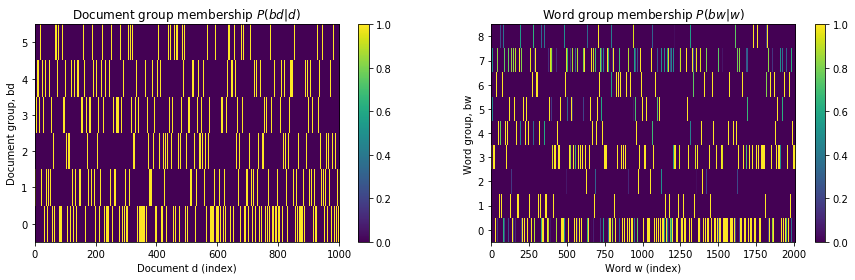

In [129]:
l=1
p_td_d,p_tw_w = model.group_membership(l=l)
fig = plt.figure(figsize=(15,4))
plt.subplot(121)
plt.imshow(p_td_d,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Document group membership $P(bd | d)$')
plt.xlabel('Document d (index)')
plt.ylabel('Document group, bd')
plt.colorbar()

plt.subplot(122)
plt.imshow(p_tw_w,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Word group membership $P(bw | w)$')
plt.xlabel('Word w (index)')
plt.ylabel('Word group, bw')
plt.colorbar()
plt.show()

In [121]:
fig.savefig("group_membership_%d.pdf"%l)
fig.savefig("group_membership_%d.png"%l)

In [184]:
overlaplenghts=[]
overlap_index = []
for i,el in enumerate(p_tw_w.T):
    mixture_size = len(np.nonzero(el)[0])
    overlaplenghts.append(mixture_size)
    if mixture_size>1:
        overlap_index.append(i)

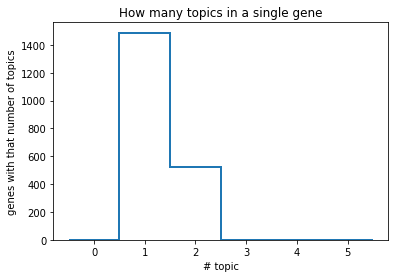

In [131]:
fig=plt.figure()
plt.title("How many topics in a single gene")
plt.xlabel("# topic")
plt.ylabel("genes with that number of topics")
plt.hist(overlaplenghts, histtype='step', lw=2, range=(-0.5,5.5), bins=6)
plt.show()
fig.savefig("overlap_size_%d.png"%l)

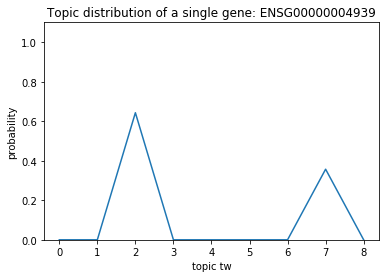

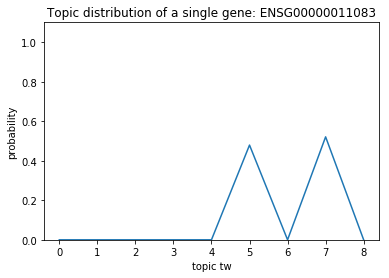

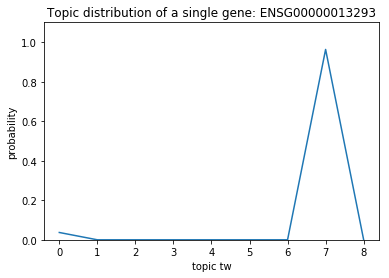

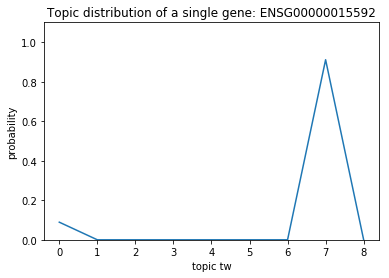

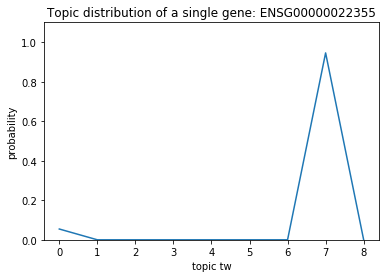

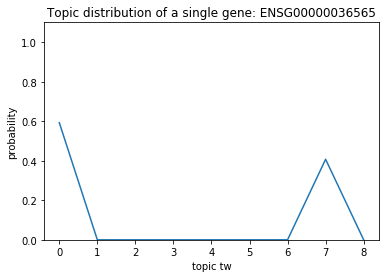

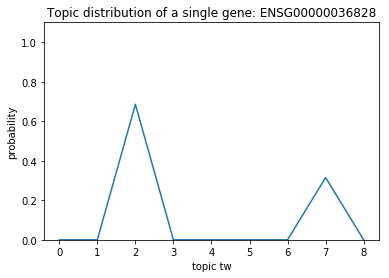

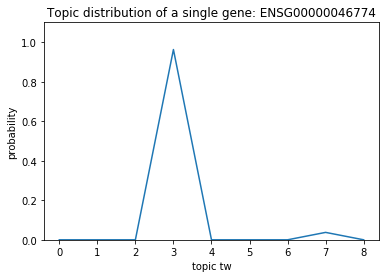

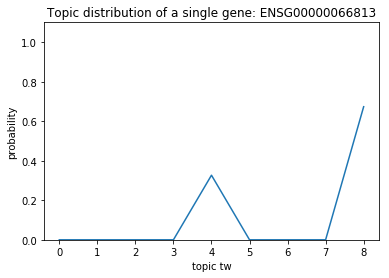

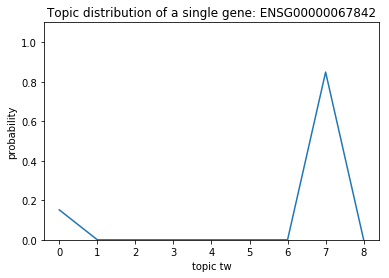

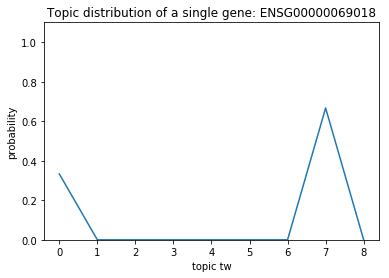

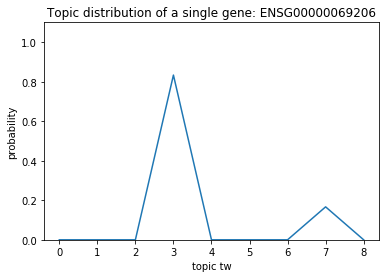

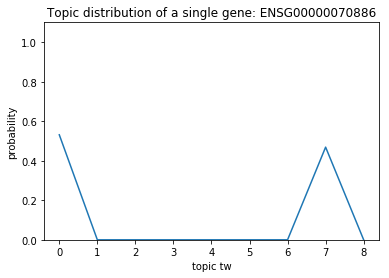

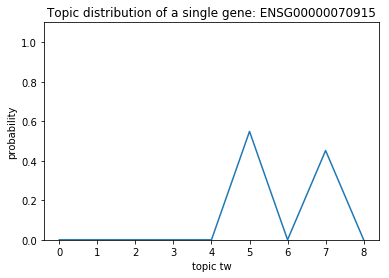

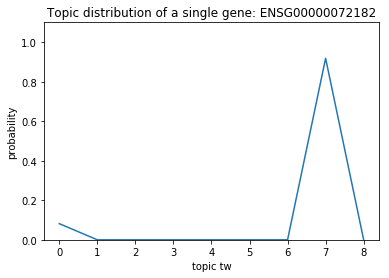

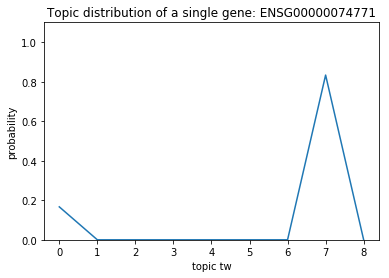

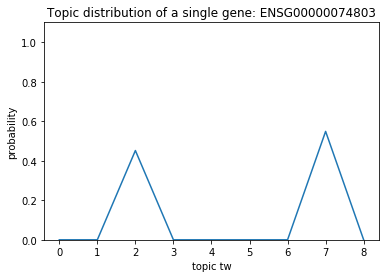

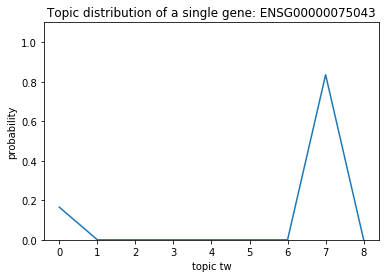

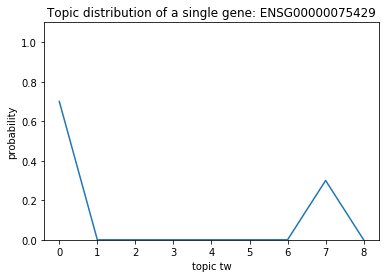

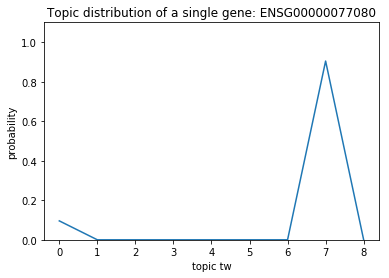

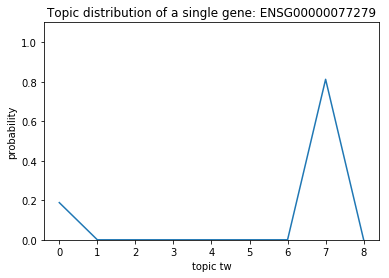

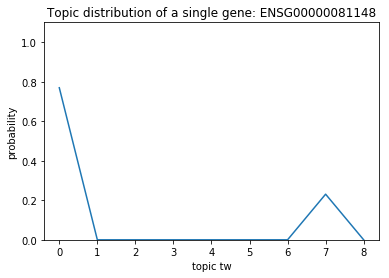

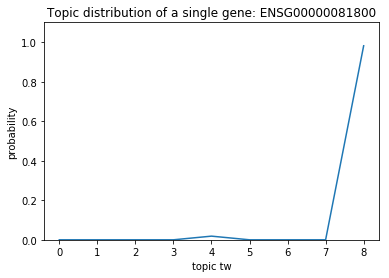

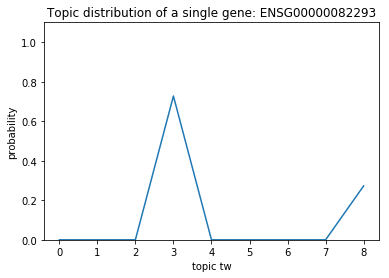

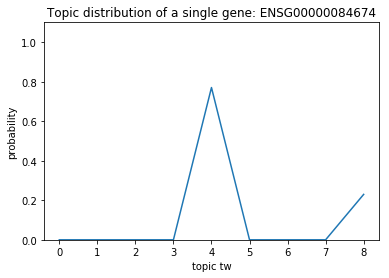

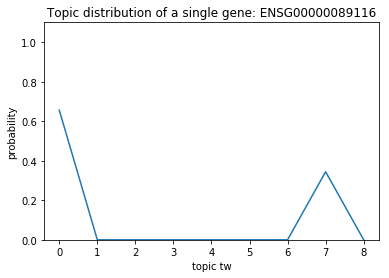

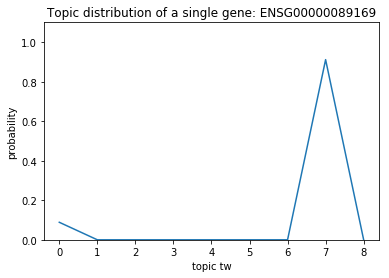

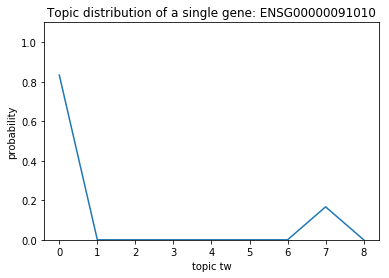

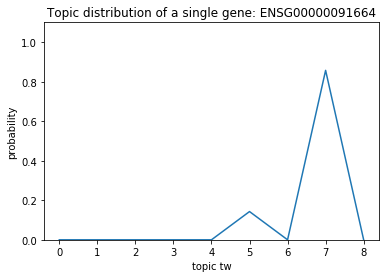

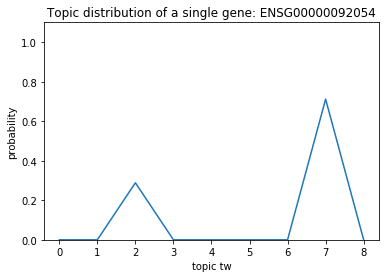

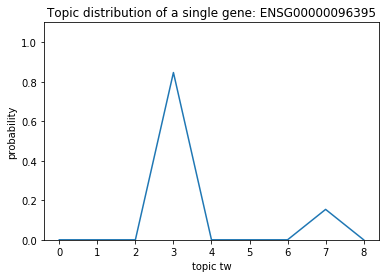

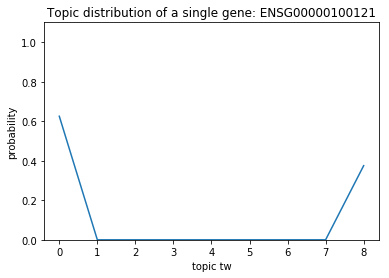

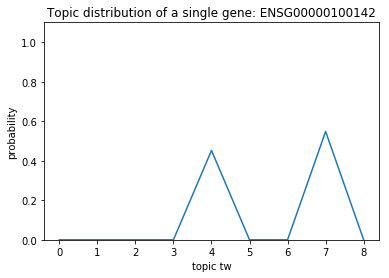

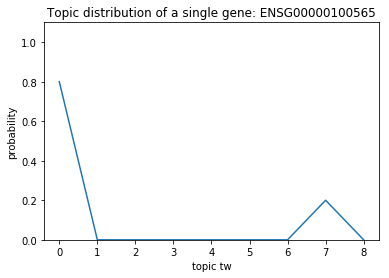

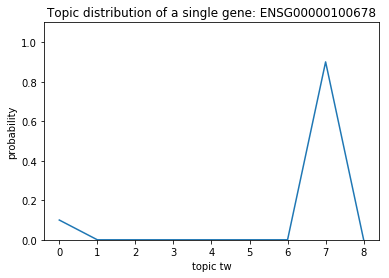

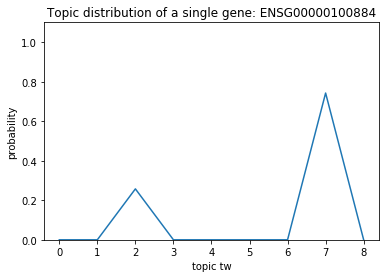

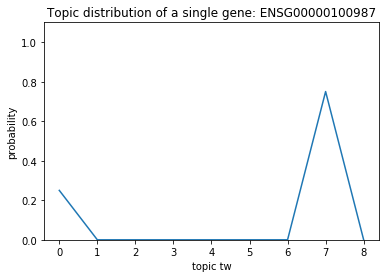

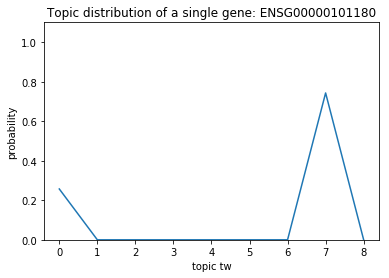

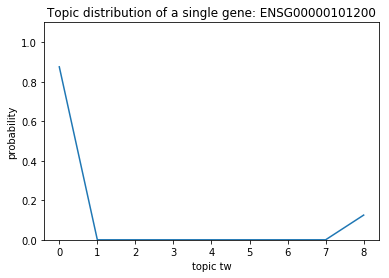

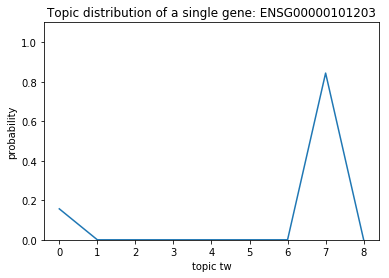

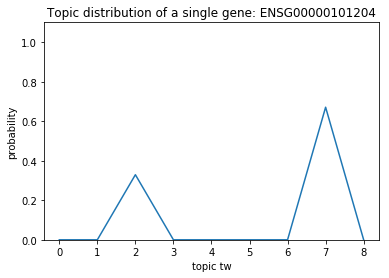

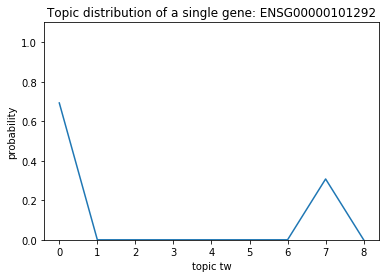

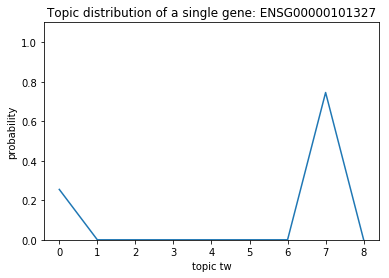

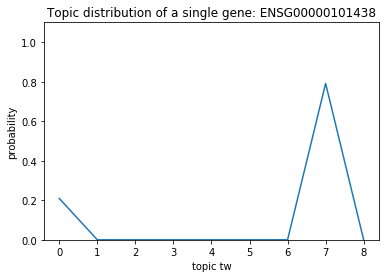

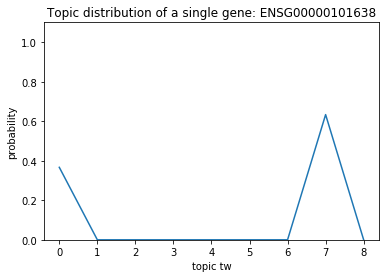

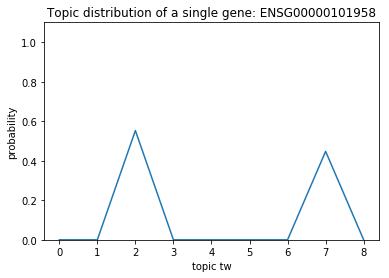

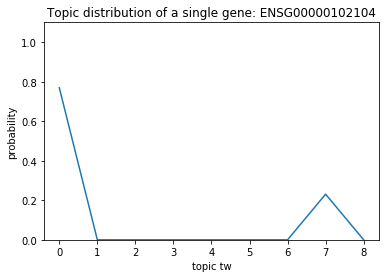

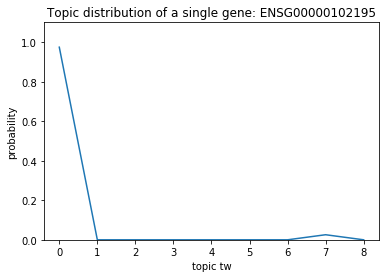

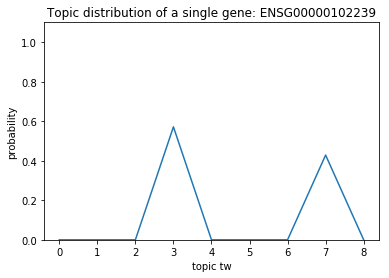

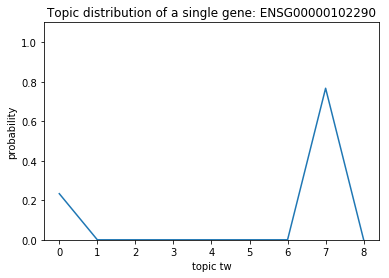

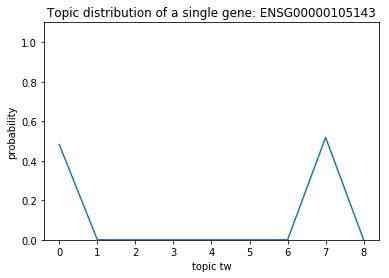

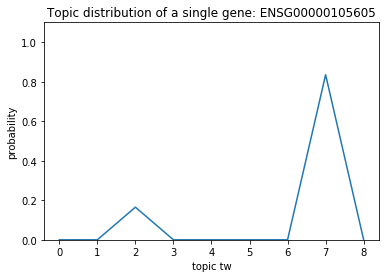

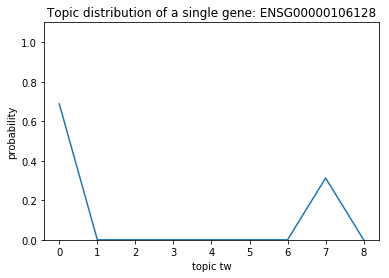

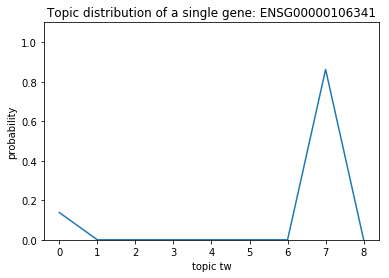

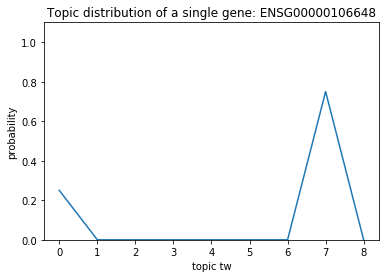

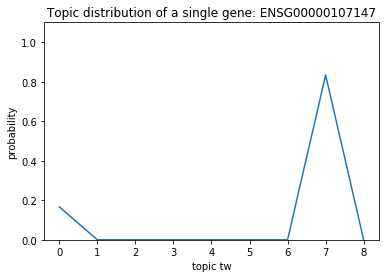

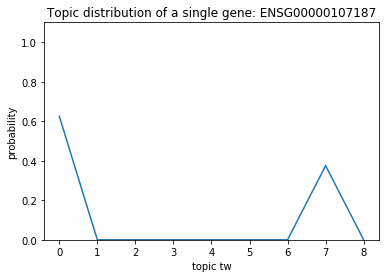

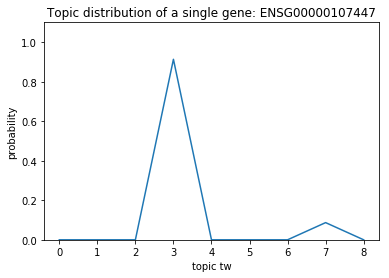

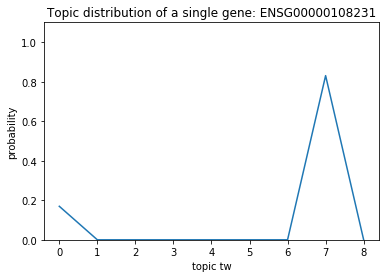

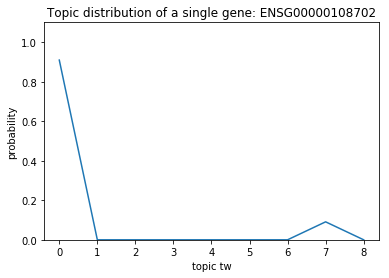

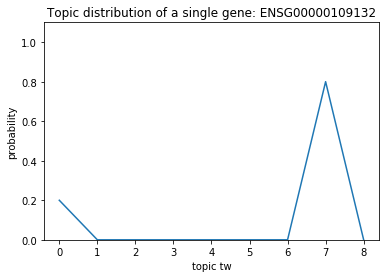

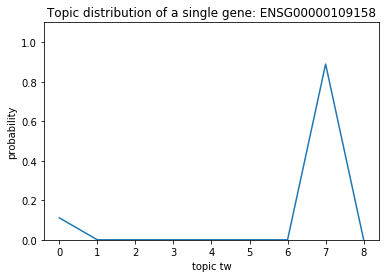

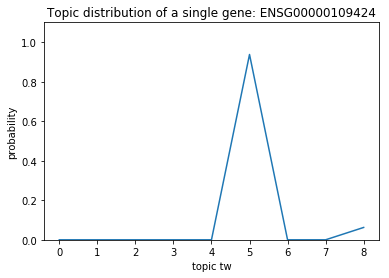

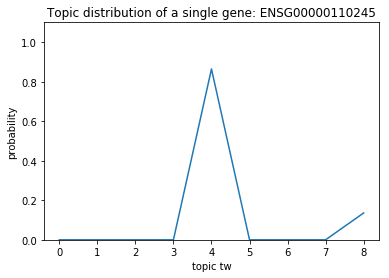

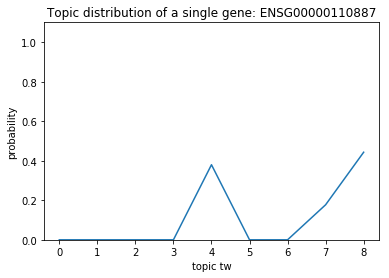

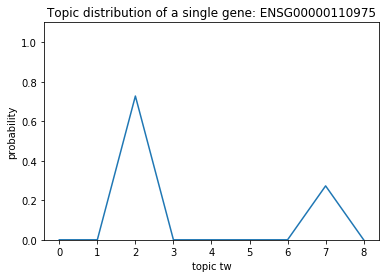

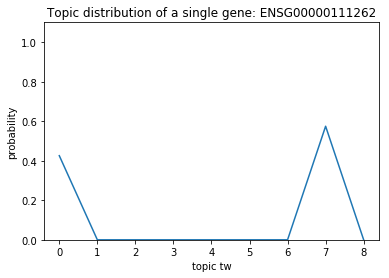

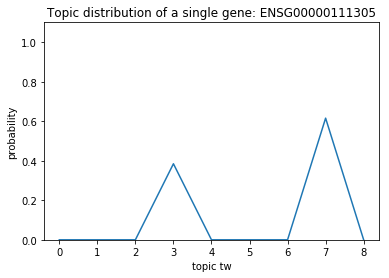

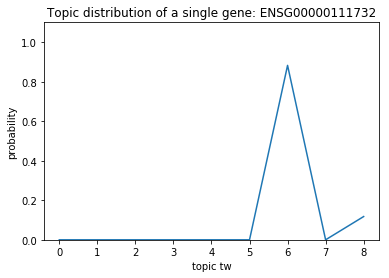

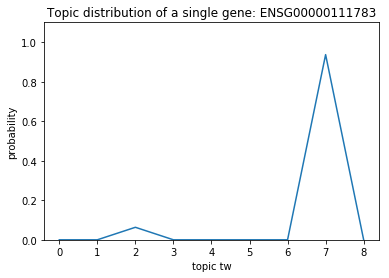

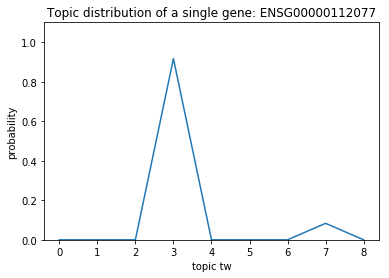

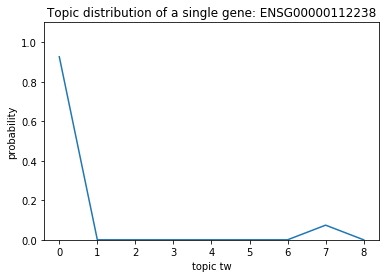

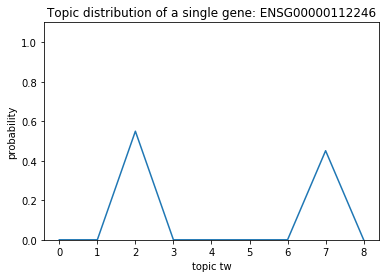

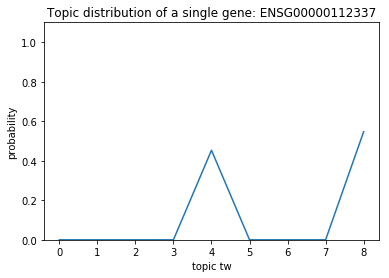

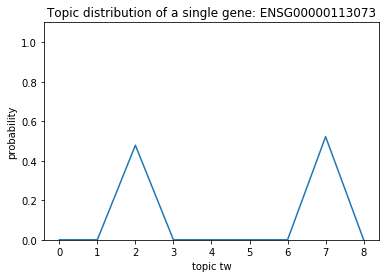

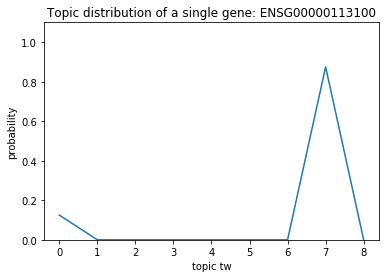

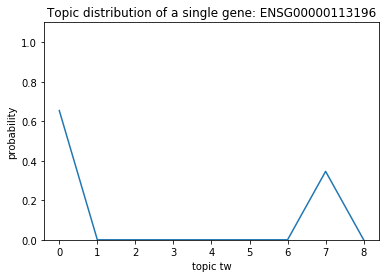

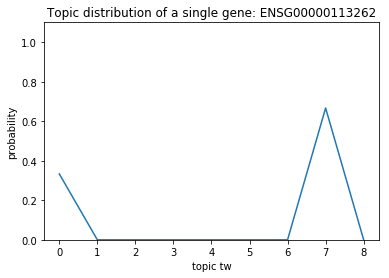

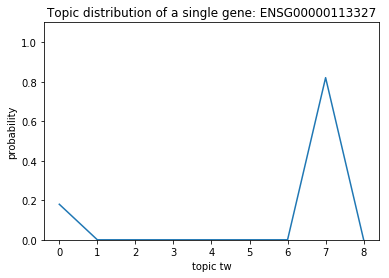

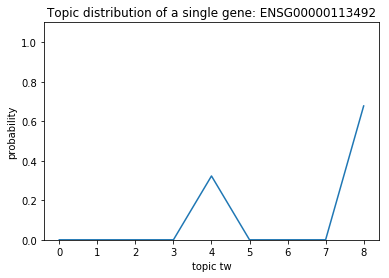

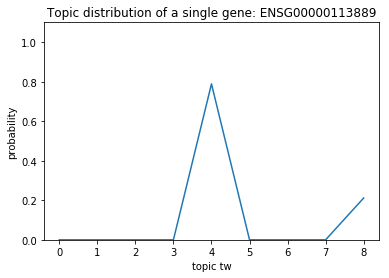

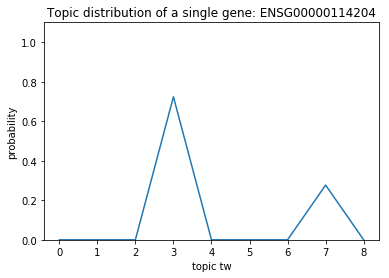

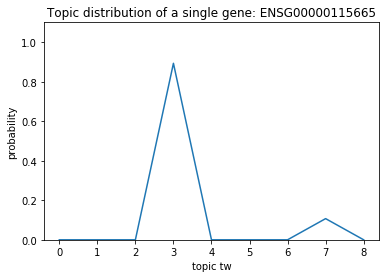

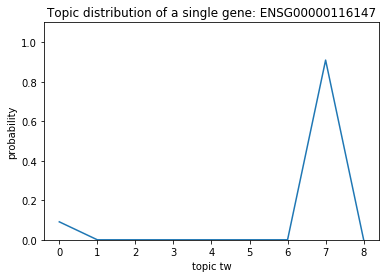

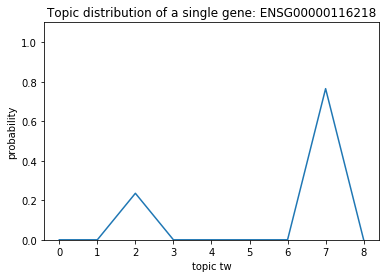

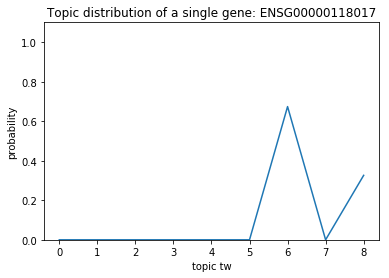

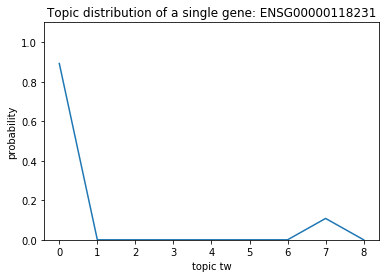

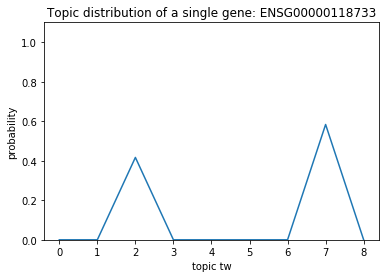

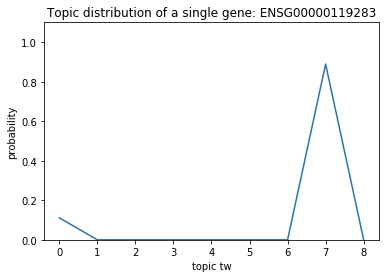

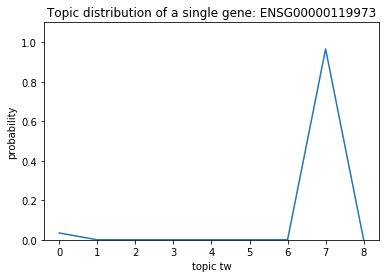

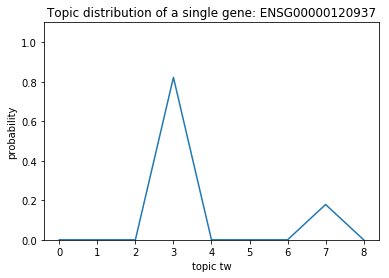

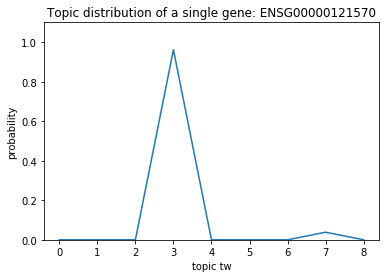

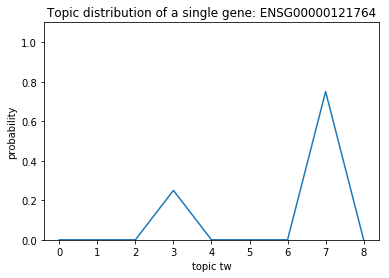

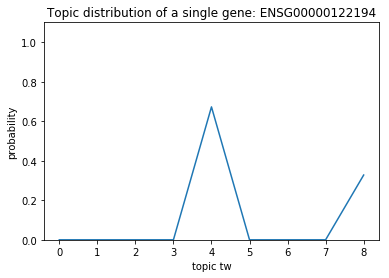

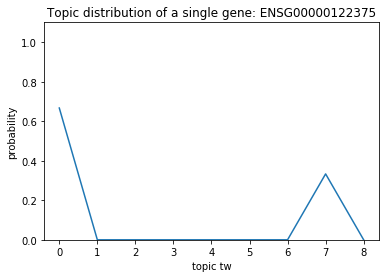

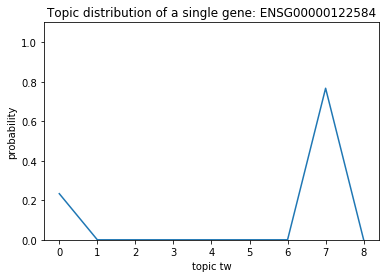

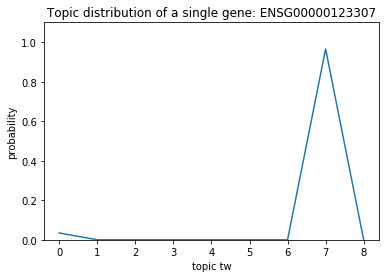

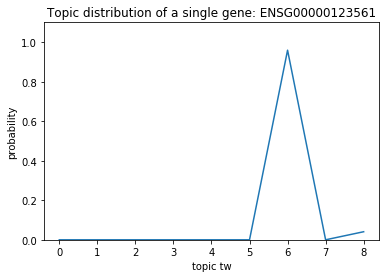

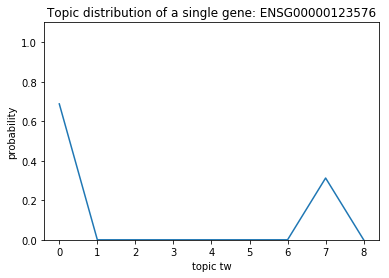

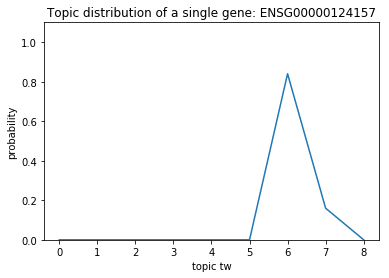

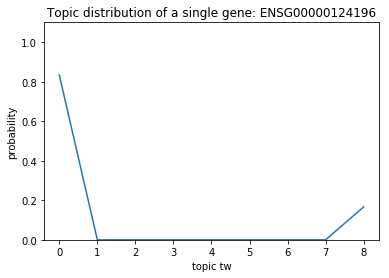

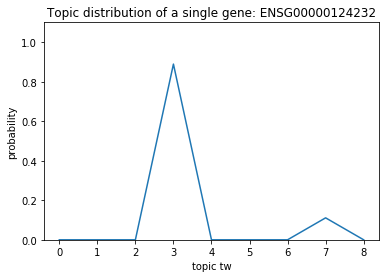

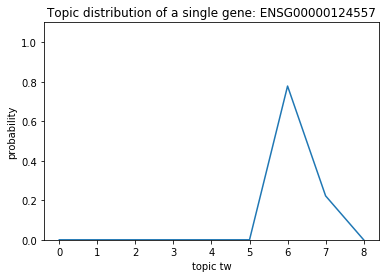

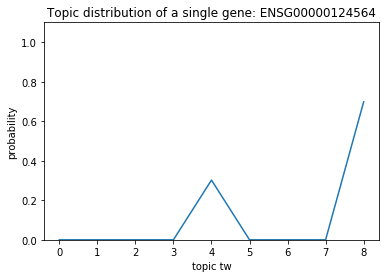

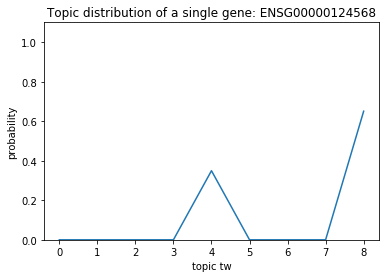

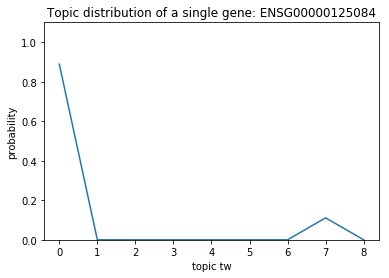

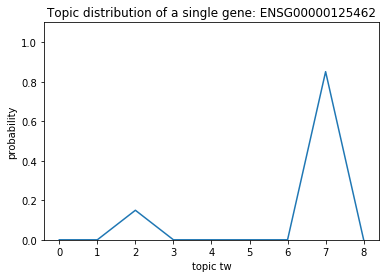

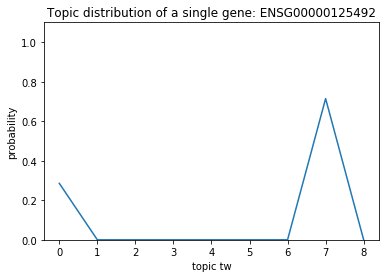

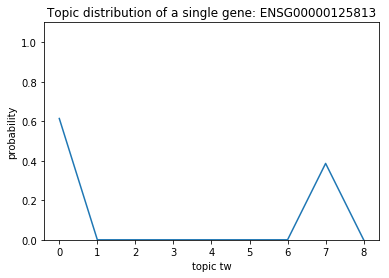

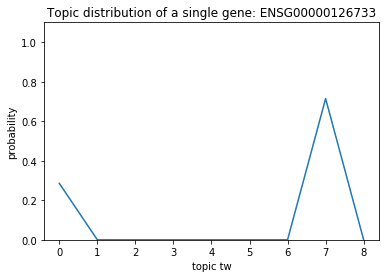

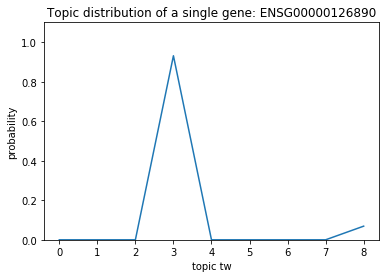

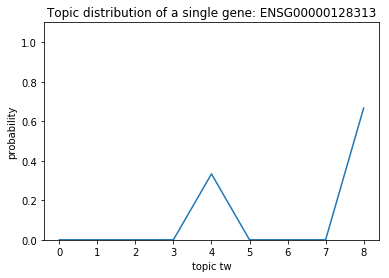

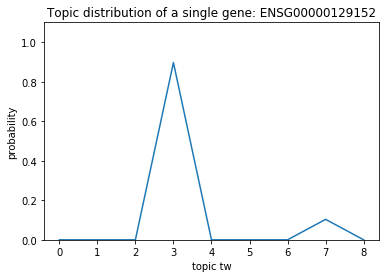

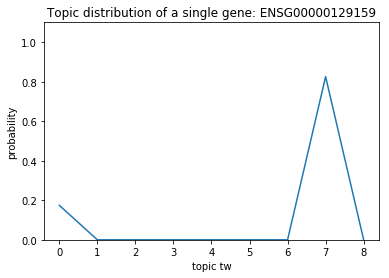

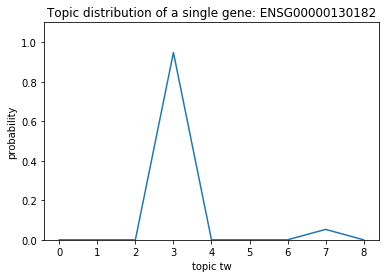

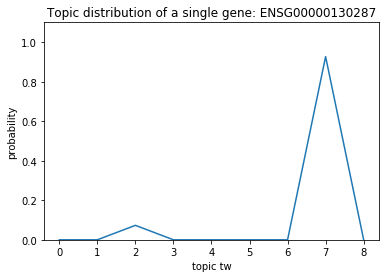

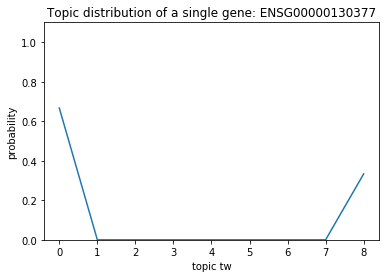

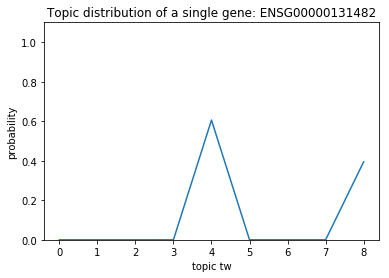

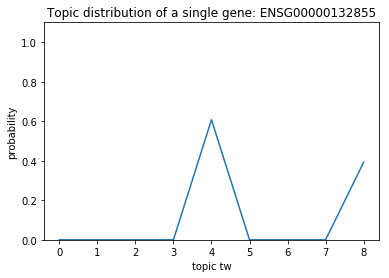

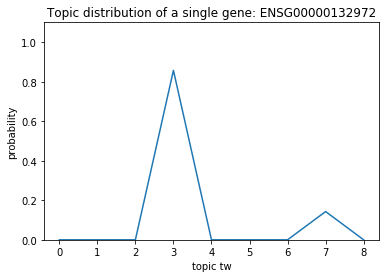

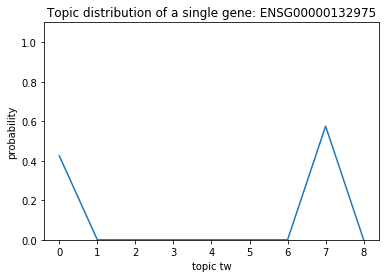

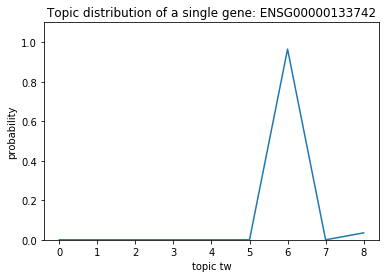

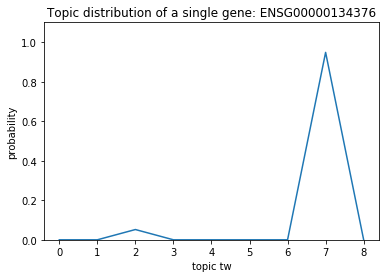

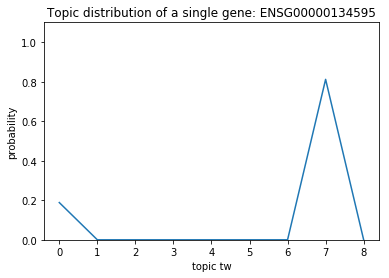

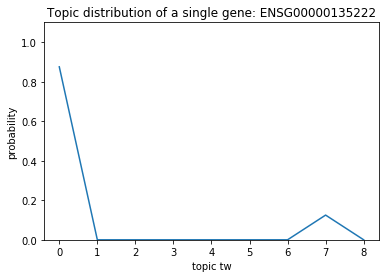

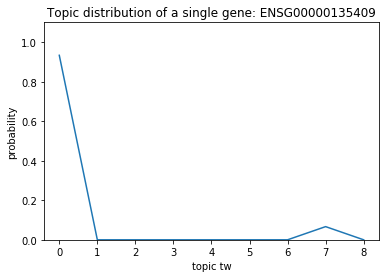

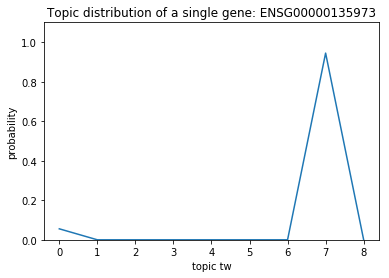

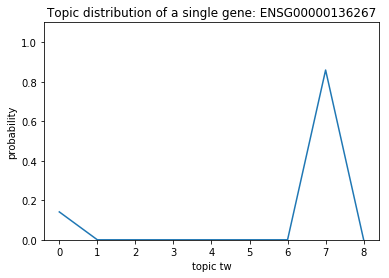

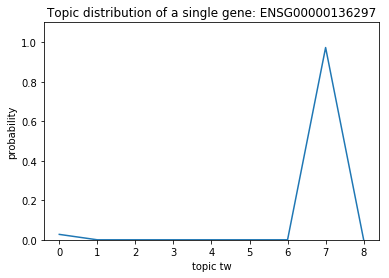

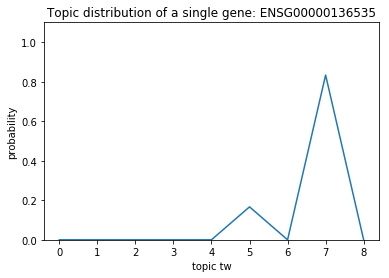

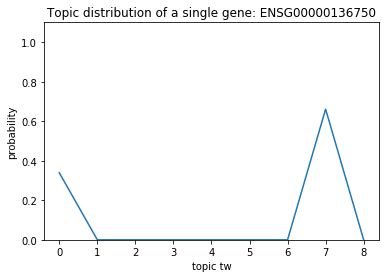

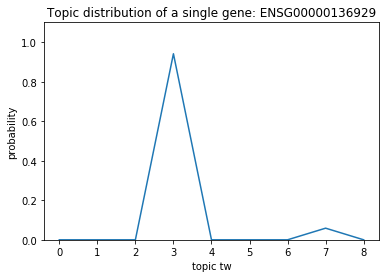

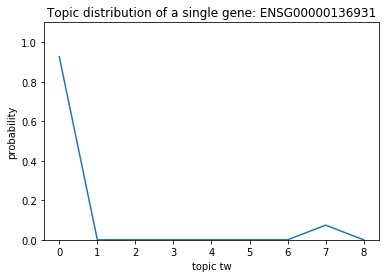

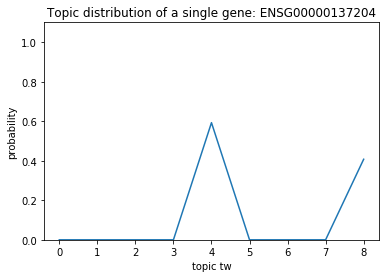

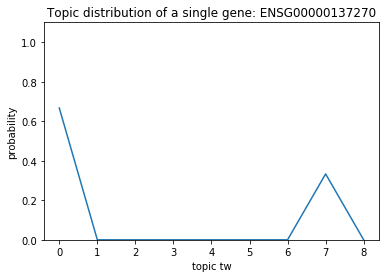

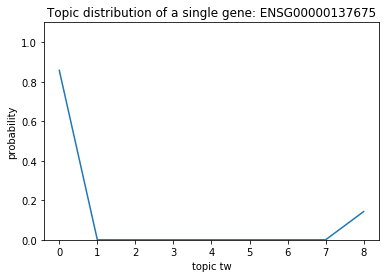

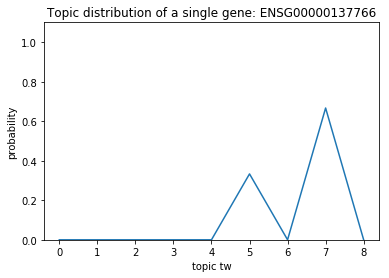

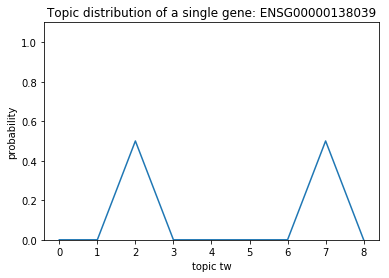

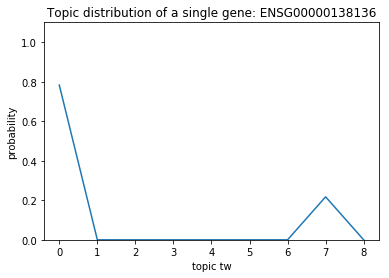

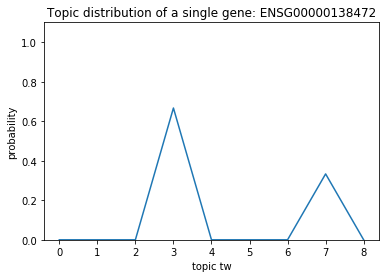

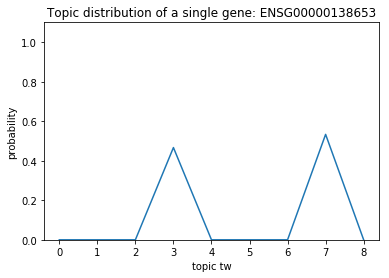

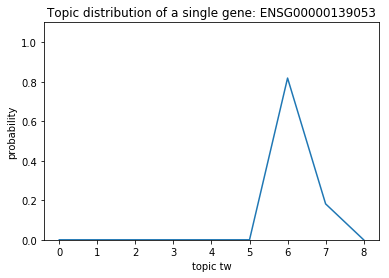

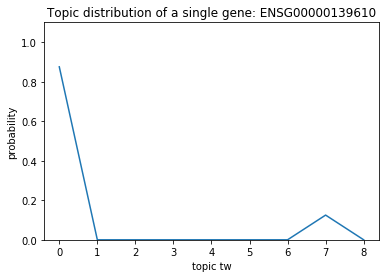

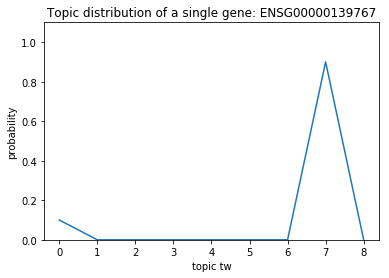

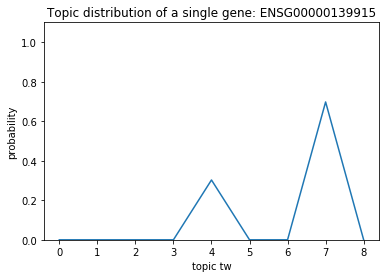

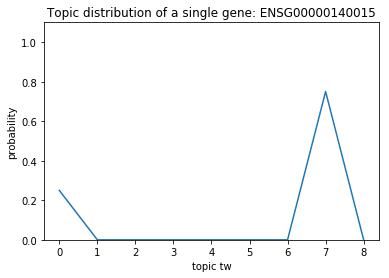

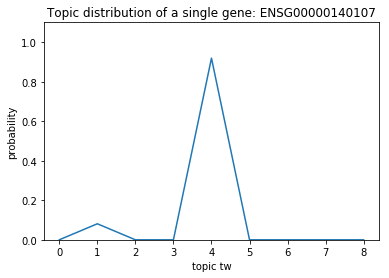

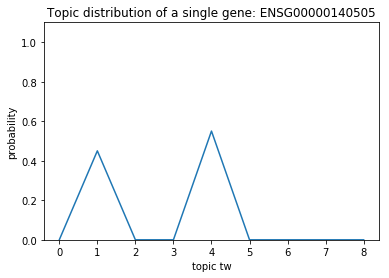

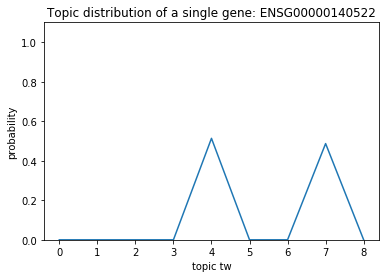

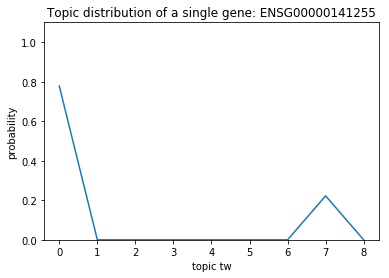

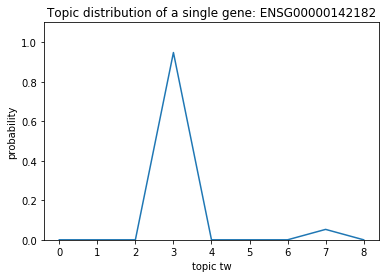

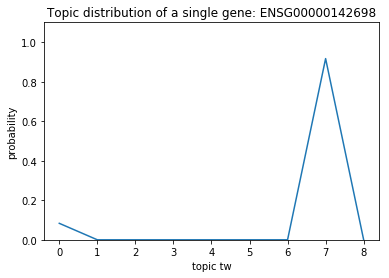

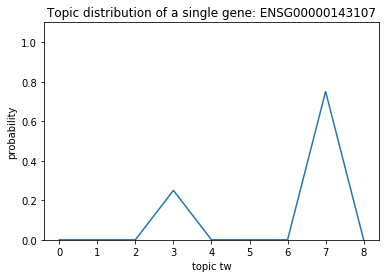

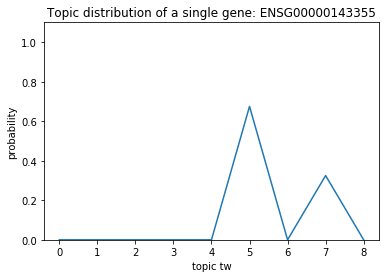

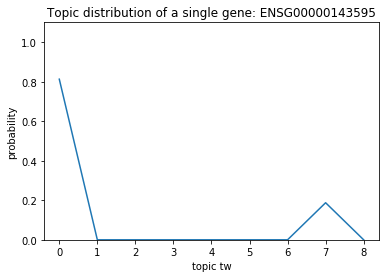

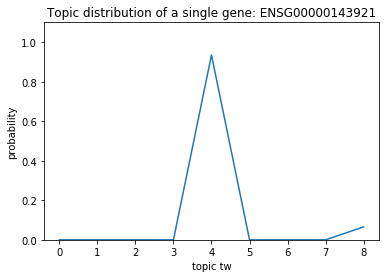

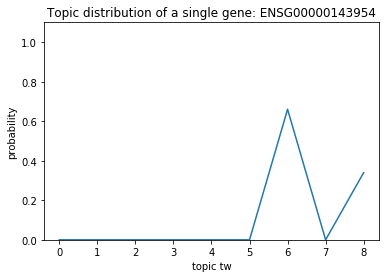

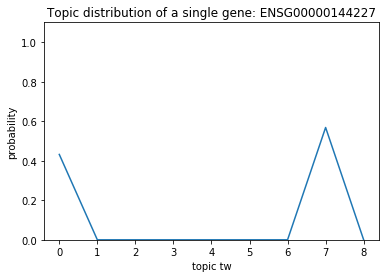

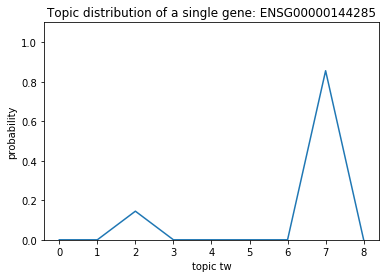

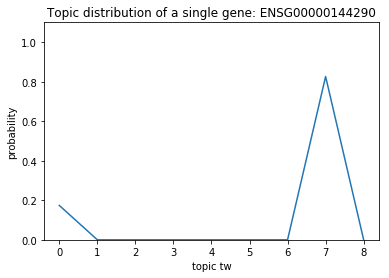

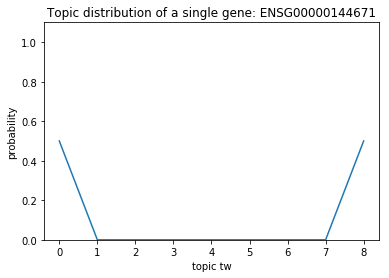

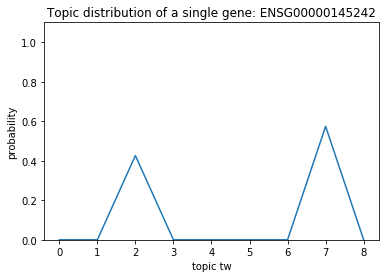

In [ ]:
gene=300
for gene in overlap_index:
    fig=plt.figure()
    plt.title("Topic distribution of a single gene: %s"%model.words[gene])
    plt.xlabel("topic tw")
    plt.ylabel("probability")
    plt.ylim((0,1.1))
    plt.plot(p_tw_w.T[gene])
    plt.show()
    fig.savefig("distribution_single_gene_%s.png"%model.words[gene])

## overlapping genes

In [95]:
#get genes overlapping
overlappinggenes = []
for i,el in enumerate(p_tw_w.T):
    if(len(np.nonzero(el)[0])>1):
        overlappinggenes.append(model.words[i])

In [96]:
for g in overlappinggenes:
    print(g)

ENSG00000004939
ENSG00000011083
ENSG00000013293
ENSG00000015592
ENSG00000022355
ENSG00000036565
ENSG00000036828
ENSG00000046774
ENSG00000066813
ENSG00000067842
ENSG00000069018
ENSG00000069206
ENSG00000070886
ENSG00000070915
ENSG00000072182
ENSG00000074771
ENSG00000074803
ENSG00000075043
ENSG00000075429
ENSG00000077080
ENSG00000077279
ENSG00000081148
ENSG00000081800
ENSG00000082293
ENSG00000084674
ENSG00000089116
ENSG00000089169
ENSG00000091010
ENSG00000091664
ENSG00000092054
ENSG00000096395
ENSG00000100121
ENSG00000100142
ENSG00000100565
ENSG00000100678
ENSG00000100884
ENSG00000100987
ENSG00000101180
ENSG00000101200
ENSG00000101203
ENSG00000101204
ENSG00000101292
ENSG00000101327
ENSG00000101438
ENSG00000101638
ENSG00000101958
ENSG00000102104
ENSG00000102195
ENSG00000102239
ENSG00000102290
ENSG00000105143
ENSG00000105605
ENSG00000106128
ENSG00000106341
ENSG00000106648
ENSG00000107147
ENSG00000107187
ENSG00000107447
ENSG00000108231
ENSG00000108702
ENSG00000109132
ENSG00000109158
ENSG0000

# state analysis

In [ ]:
state = model.state

In [ ]:
level = state.get_levels()[0]

In [ ]:
level.get_blocks()[4]

In [ ]:
e=level.get_matrix()
plt.matshow(e.todense())

In [74]:
state.get_levels()[0].get_overlap_blocks()[0]

<PropertyMap object with key type 'Vertex' and value type 'vector<int32_t>', for Graph 0x7f32304ec080, at 0x7f31e94ed208>

In [66]:
model.print_topics(l=0)

In [101]:
import sys



In [ ]:
groups = model.groups[0]

In [ ]:
np.sum(groups['p_tw_d'],axis=0)

In [ ]:
groups['p_tw_d']

In [ ]:
groups

In [134]:
groups = model.groups[0]

### topicdist

In [135]:
groups = model.groups[l]

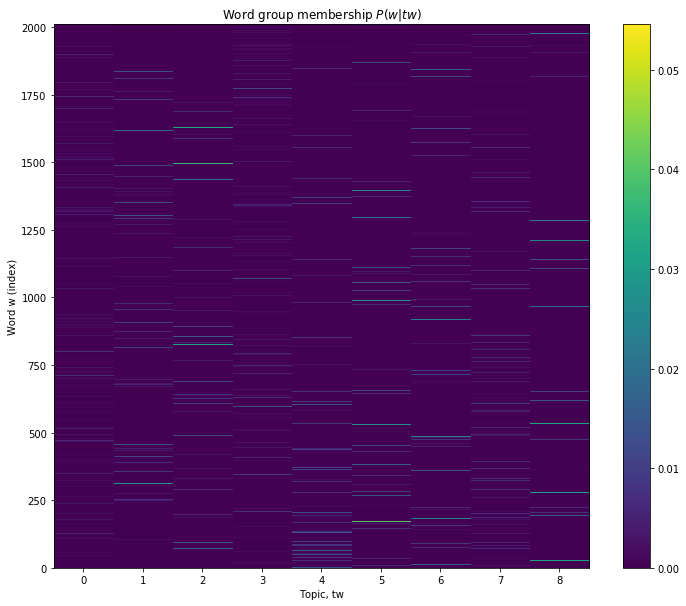

In [136]:
p_w_tw = groups['p_w_tw']
fig=plt.figure(figsize=(12,10))
plt.imshow(p_w_tw,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Word group membership $P(w | tw)$')
plt.xlabel('Topic, tw')
plt.ylabel('Word w (index)')
plt.colorbar()
fig.savefig("p_w_tw_%d.png"%l)

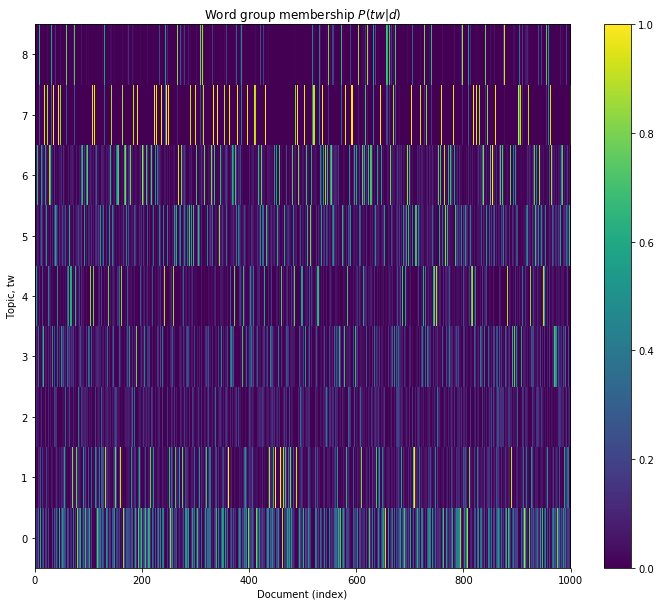

In [137]:
p_tw_d = groups['p_tw_d']
fig=plt.figure(figsize=(12,10))
plt.imshow(p_tw_d,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Word group membership $P(tw | d)$')
plt.xlabel('Document (index)')
plt.ylabel('Topic, tw')
plt.colorbar()
fig.savefig("p_tw_d_%d.png"%l)

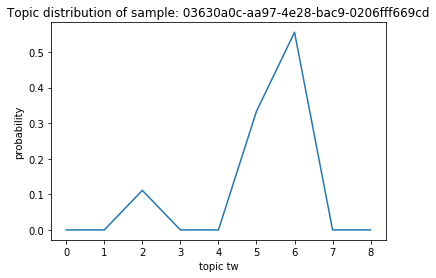

In [164]:
doc=12
title = model.documents[doc]
fig=plt.figure()
plt.title("Topic distribution of sample: %s"%title)
plt.xlabel("topic tw")
plt.ylabel("probability")
plt.plot(p_tw_d.T[doc])
plt.show()
fig.savefig("distribution_single_sample_%d.png"%doc)